## Задания:
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
10. Выберите формулу для модели, проведите тест.

## Описание данных
`5_task_1:`

* id – id клиента в эксперименте
* group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
* events – сколько блюд суммарно было заказано за период

`5_task_2:`

* id – id клиента в эксперименте
* segment – сегмент (high/low)
* group – вид кнопки (control – старая версия, test – новая версия)
* events – сколько блюд суммарно было заказано за период


Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

A – прямоугольные 16:9

B – квадратные

C – прямоугольные 12:4

Групп больше двух, значит пользуемся ANOVA


Проверим, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin

import warnings
warnings.filterwarnings("ignore")

In [5]:
task_1 = pd.read_csv('/Users/pavel/Desktop/karpov/7 СТАТИСТИКА/5_task_1.csv')
task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [6]:
task_2 = pd.read_csv('/Users/pavel/Desktop/karpov/7 СТАТИСТИКА/5_task_2.csv')
task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [11]:
scipy.stats.levene(task_1.query("group == 'A'").events,\
                   task_1.query("group == 'B'").events,\
                   task_1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

**p-value > 0.05, не отклоняем нулевую гипотезу**

Также убедимся, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделаем семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используем параметр random_state=17 в методе sample.

In [23]:
scipy.stats.shapiro(task_1.query("group == 'A'").events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.997315526008606, pvalue=0.09612562507390976)

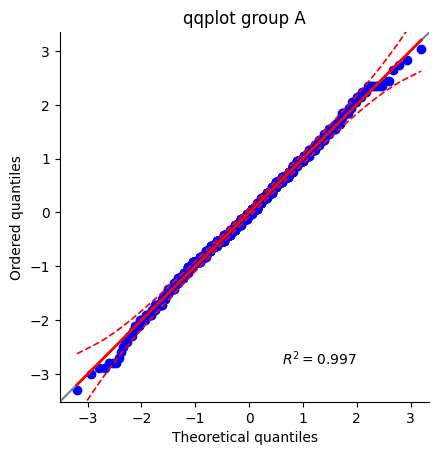

In [44]:
ax = pingouin.qqplot((task_1.query("group == 'A'").events.sample(1000, random_state = 17)))
ax.set_title("qqplot group A")
sns.despine()

In [33]:
scipy.stats.shapiro(task_1.query("group == 'B'").events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9980816841125488, pvalue=0.3185332119464874)

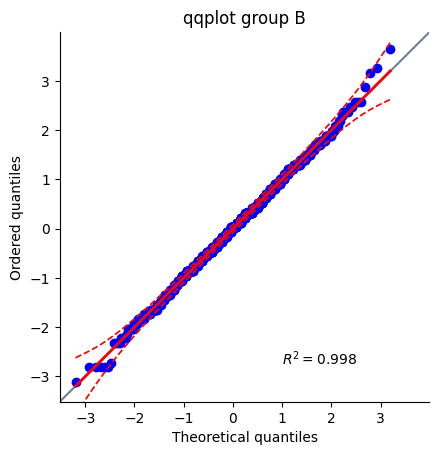

In [46]:
fig = plt.figure()
ax = pingouin.qqplot((task_1.query("group == 'B'").events.sample(1000, random_state = 17)))
ax.set_title("qqplot group B")
sns.despine()

In [37]:
scipy.stats.shapiro(task_1.query("group == 'C'").events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9981187582015991, pvalue=0.3359951972961426)

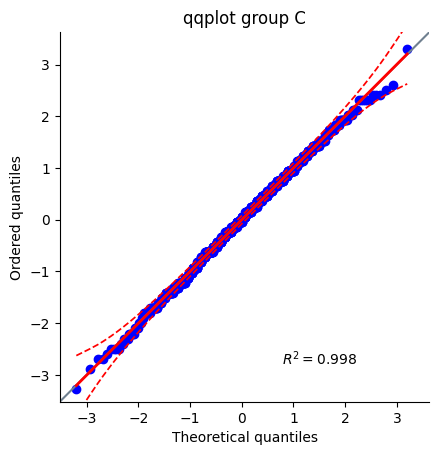

In [47]:
fig = plt.figure()
ax = pingouin.qqplot((task_1.query("group == 'C'").events.sample(1000, random_state = 17)))
ax.set_title("qqplot group C")
sns.despine()

In [39]:
scipy.stats.normaltest(task_1.query("group == 'A'").events.sample(1000, random_state = 17))

NormaltestResult(statistic=0.6421907772748111, pvalue=0.7253540571548922)

In [40]:
scipy.stats.normaltest(task_1.query("group == 'B'").events.sample(1000, random_state = 17))

NormaltestResult(statistic=0.7993452547417171, pvalue=0.6705395263954472)

In [41]:
scipy.stats.normaltest(task_1.query("group == 'C'").events.sample(1000, random_state = 17))

NormaltestResult(statistic=1.5761199866762348, pvalue=0.4547261118122219)

In [25]:
scipy.stats.shapiro(task_1.query("group == 'A'").events)

ShapiroResult(statistic=0.9989336133003235, pvalue=3.9211804505612236e-06)

In [26]:
scipy.stats.shapiro(task_1.query("group == 'B'").events)

ShapiroResult(statistic=0.9990164041519165, pvalue=1.0541976735112257e-05)

In [27]:
scipy.stats.shapiro(task_1.query("group == 'C'").events)

ShapiroResult(statistic=0.9989206194877625, pvalue=3.3676949442451587e-06)

Тест Шапиро-Уилка без семплирования дает значения p-value 4.32, 3.39, 1.05

* **Распределение events в группе B является нормальным**
* **Распределение events в группе A является нормальным**
* **Распределение events в группе С является нормальным**

Проводим тест 

In [48]:
scipy.stats.f_oneway(task_1.query("group == 'A'").events.sample(1000, random_state = 17),
                    task_1.query("group == 'B'").events.sample(1000, random_state = 17),
                    task_1.query("group == 'C'").events.sample(1000, random_state = 17))

F_onewayResult(statistic=293.70244548162333, pvalue=3.3198466072089916e-117)

Для сравнения средних я использую `ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ`. Значение статистики равно (окр. до целого) `2886`, а р-уровень значимости составил `0`.

Теперь используем критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [52]:
res = scipy.stats.tukey_hsd(task_1.query("group == 'A'").events,
                    task_1.query("group == 'B'").events,
                    task_1.query("group == 'C'").events)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -8.034     0.000    -8.364    -7.704
 (0 - 2)      2.109     0.000     1.779     2.440
 (1 - 0)      8.034     0.000     7.704     8.364
 (1 - 2)     10.143     0.000     9.813    10.474
 (2 - 0)     -2.109     0.000    -2.440    -1.779
 (2 - 1)    -10.143     0.000   -10.474    -9.813



В этим группах есть значимые различия:
* **A и C**
* **B и C**
* **A и B**



Так какие картинки в итоге будем использовать?

<Axes: xlabel='group', ylabel='events'>

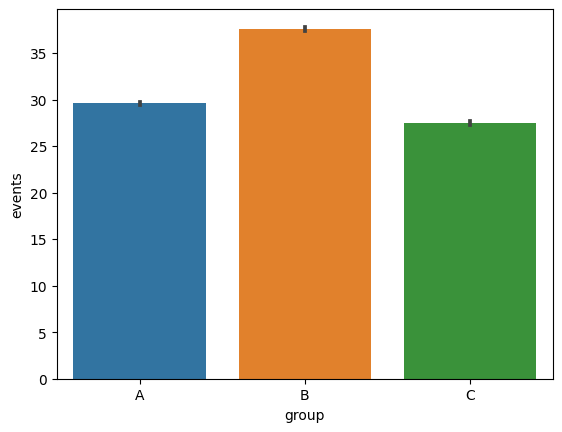

In [57]:
sns.barplot(data = task_1, x = 'group', y = 'events')

**Будем использовать квадратные картинки**


Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

В этом случает пригодится метод многофакторный дисперсионный анализ


Посмотрим на данные. Для начала визуализируем распределение events для контрольной и тестовой групп.

A - `Контрольная группа`

B - `Тестовая группа`

In [58]:
task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


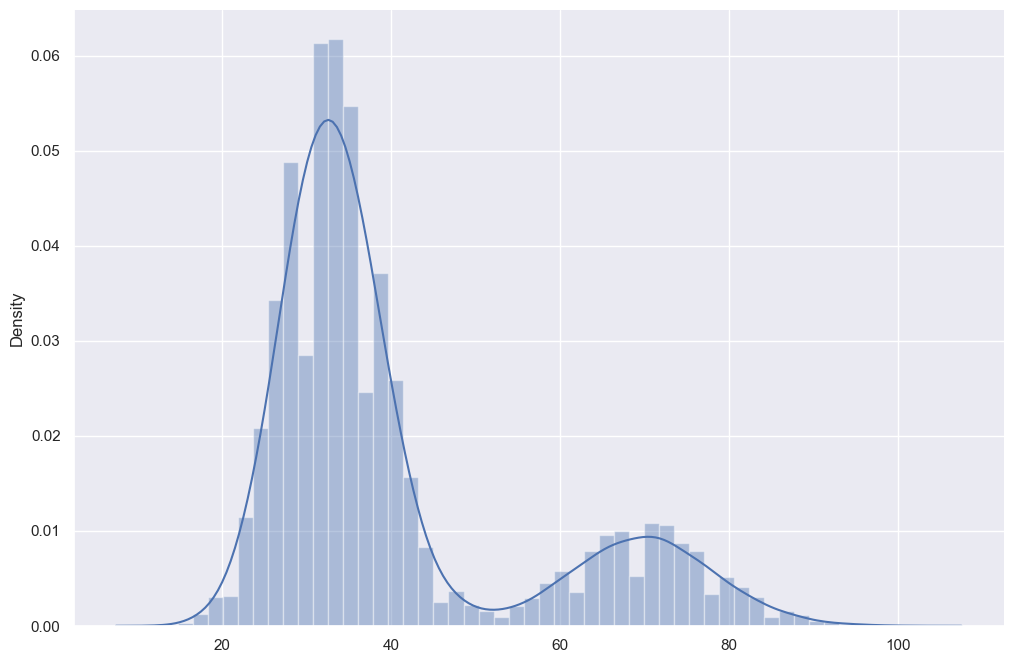

In [75]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(x = task_2.query("group == 'test'").events)
sns.despine()

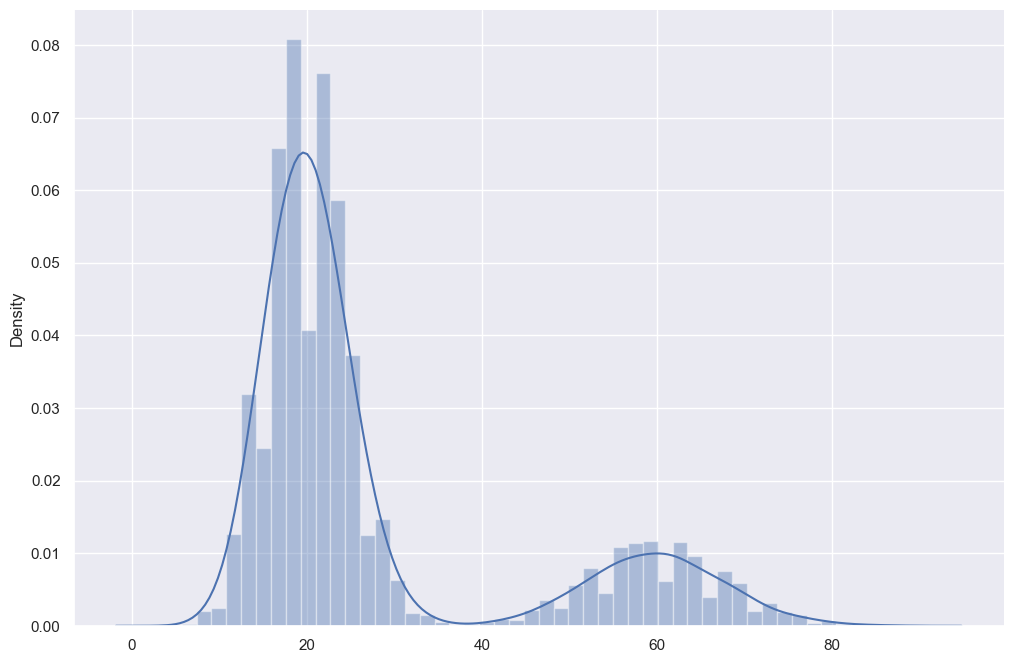

In [98]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(x = task_2.query("group == 'control'").events)
sns.despine()

Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [104]:
task_2.groupby(['group', 'segment'], as_index = False).agg({'events' : ['mean','median', 'std']}).round(2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

Осталось выбрать формулу для модели. Мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

**Будем использовать формулу для statsmodels events ~ segment + group + segment:group**


Проведем тест, а затем используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [107]:
pingouin.anova(data = task_2, dv = 'events', between = ['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [110]:
task_2['combination'] = task_2.group + ' / ' + task_2.segment
task_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [112]:
pingouin.pairwise_tukey(data = task_2, dv = 'events', between = 'combination').round(2)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.97,20.03,39.94,0.07,610.39,0.0,7.52
1,control / high,test / high,59.97,69.94,-9.97,0.08,-120.43,0.0,-1.23
2,control / high,test / low,59.97,33.03,26.94,0.07,411.80,0.0,4.35
3,control / low,test / high,20.03,69.94,-49.91,0.07,-762.73,0.0,-9.09
4,control / low,test / low,20.03,33.03,-12.99,0.04,-314.00,0.0,-2.53
5,test / high,test / low,69.94,33.03,36.91,0.07,564.14,0.0,5.81


* **Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13**
* **Разница между control/high и test/high составила около 10**
* **Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой**


Визуализируем результаты теста:

<Axes: xlabel='group', ylabel='events'>

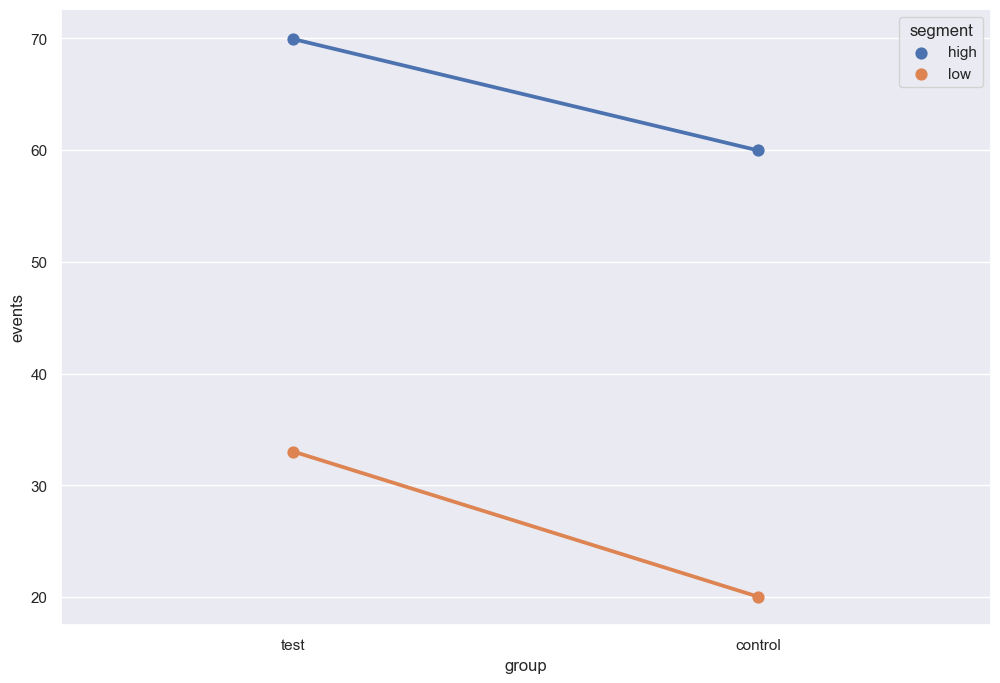

In [116]:
sns.pointplot(data = task_2, x = 'group', y = 'events', hue = 'segment')

Фактор group оказался `ЗНАЧИМЫМ`, фактор segment – `ЗНАЧИМЫМ`, их взаимодействие – `ЗНАЧИМО`. Судя по графику, для всех групп среднее значение events `УВЕЛИЧИЛОСЬ`, поэтому решение: `ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ`